In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
caminho = '06_arquivos/dados_climaticos.csv'

dados_df = pd.read_csv(caminho, sep=';', encoding='utf-8', low_memory=False)


In [3]:

#display(dados_df)

In [4]:
# trasformando as informaçoes para formato eua
#display(dados_df)
dados_df['Data'] = pd.to_datetime(dados_df['Data'], dayfirst=True, errors='coerce')
#display(dados_df)

In [5]:
# Lista de colunas numÃ©ricas
colunas_numericas = [
"Temp. Ins. (C)", "Temp. Max. (C)", "Temp. Min. (C)", "Umi. Ins. (%)",
"Umi. Max. (%)", "Umi. Min. (%)", "Pto Orvalho Ins. (C)", "Pto Orvalho Max. (C)",
"Pto Orvalho Min. (C)", "Pressao Ins. (hPa)", "Pressao Max. (hPa)",
"Pressao Min. (hPa)", "Vel. Vento (m/s)", "Dir. Vento (m/s)", "Raj. Vento (m/s)",
"Radiacao (KJ/m²)", "Chuva (mm)"]

In [6]:
# convertendo as virgulas(,) par ponto(.)
for col in colunas_numericas:
    # trocando a virgula prelo ponto
    dados_df[col] = dados_df[col].astype(str).str.replace(',','.', regex=False)
    # converter A STRING QUE REPRESENTAM VALORES REAIS EM NÚMEROS FLOAT 
    dados_df[col] = pd.to_numeric(dados_df[col], errors='coerce')

In [7]:
display(dados_df)

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,2025-02-07,0,23.8,24.6,23.6,58.0,61.0,56.0,15.1,15.6,15.1,886.5,886.5,886.0,3.1,109.0,7.0,NaN,0.0
1,2025-02-07,100,22.7,23.8,22.7,59.0,59.0,57.0,14.3,15.0,14.1,886.8,886.8,886.4,3.1,106.0,6.7,NaN,0.0
2,2025-02-07,200,22.0,22.8,21.8,65.0,65.0,59.0,15.0,15.0,14.3,886.9,887.0,886.8,3.1,95.0,5.7,NaN,0.0
3,2025-02-07,300,21.7,22.0,21.6,66.0,66.0,65.0,15.0,15.1,15.0,886.7,887.0,886.6,2.6,103.0,5.7,NaN,0.0
4,2025-02-07,400,21.3,21.8,21.3,67.0,67.0,65.0,14.9,15.0,14.9,886.5,886.7,886.5,1.6,110.0,5.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2025-04-07,1900,23.6,24.4,23.2,62.0,65.0,60.0,16.0,17.1,15.6,886.9,887.2,886.8,3.2,126.0,6.3,1465.9,0.0
1436,2025-04-07,2000,22.9,24.2,22.8,66.0,67.0,62.0,16.2,16.8,15.6,886.9,887.0,886.9,3.3,123.0,6.8,929.0,0.0
1437,2025-04-07,2100,21.8,22.8,21.8,72.0,72.0,66.0,16.4,16.9,15.7,887.1,887.1,886.8,2.8,129.0,6.5,247.5,0.0
1438,2025-04-07,2200,20.8,21.8,20.8,77.0,77.0,72.0,16.7,16.8,16.4,887.2,887.2,887.0,2.0,122.0,5.6,4.9,0.0


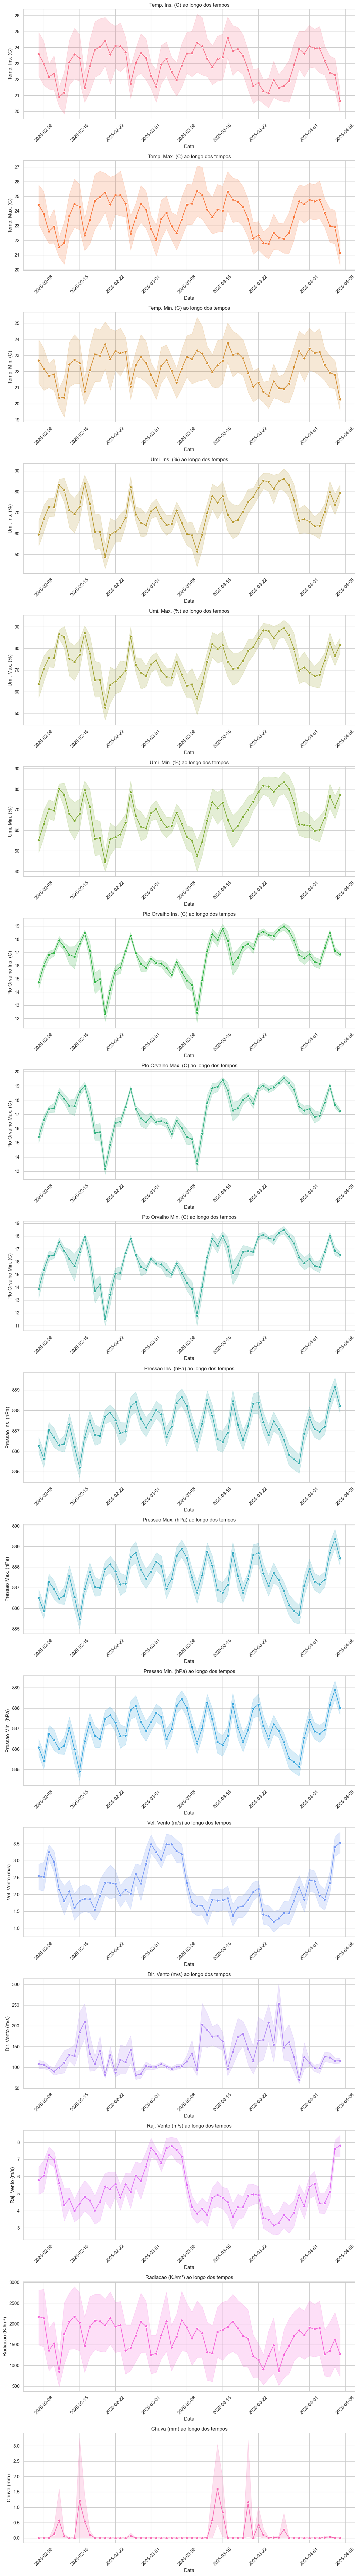

In [8]:
# plotando tudo ...
# configura o estilo do grafico
sns.set(style="whitegrid")
# criando uma paleta de cores com estiloi "husl" com uma cor diferente para cada coluna numerica
colors = sns.color_palette("husl",len(colunas_numericas))

# Criar uma figura com varias fotografias(subplots) disposto em uma coluna (1 por linha)
# O figsize ajusta o tamanho da imagem final proporcionalmente ao número de gráficos
fig, axes = plt.subplots(len(colunas_numericas), 1, figsize=(12, 5 * len(colunas_numericas)))

for i, col in enumerate(colunas_numericas):
    # gera um grafico de linhas para vartiavel ao longo da coluna 
    # usar os eixos e aplicar uma cor distinta
    # adicionar marcador em cada ponto de linha
    sns.lineplot(x=dados_df["Data"], y=dados_df[col], ax=axes[i], color=colors[i], marker='o')
    # definir o titulos e os rotulos
    axes[i].set_title(f"{col} ao longo dos tempos")
    axes[i].set_xlabel("Data")
    axes[i].set_ylabel(col)
    # girra os eixos x para 45º para melhorar a leitura
    axes[i].tick_params(axis="x", rotation=45)
    
# Ajustar os layout para evitar sobreposições
plt.tight_layout()
# mostra os graficos
plt.show()